# GeoPandas

## Introducció

GeoPandas és un projecte de codi obert per treballar amb dades geoespacials en Python.
Es tracta d'una extensió de les estructures de dades de Pandas per poder representar dades geomètriques i efectuar operacions espaials.

GeoPandas depèn de les llibreries: *numpy*, *pandas*, *shapely*, *fiona*, *pyproj* i *six*.
A més, per a la representació gràfica requereix *matplotlib*, *descartes* i *mapclassify*.

La importació acostuma a fer-se amb l'àlies `gpd`.

In [2]:
import geopandas as gpd

Les opcions de la llibreria poden consultar-se amb l'atribut `options`.

In [3]:
gpd.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.)

## Estructures de dades

GeoPandas utilitza els tres tipus d'objectes geomètrics o vectors de la llibreria **shapely**:

* punts: Point / MultiPoint
* línies: Line / MultiLine
* polígons: Polygon / MultiPolygon



In [4]:
from shapely.geometry import Point, Polygon

Aquests objectes s'implementen a través de dues estructures de dades: `GeoSeries` i `GeoDataFrame`, que són subclasses de `Series` i `DataFrame` de **Pandas**.

### GeoSeries

Es tracta d'un vector que conté un conjunt d'objectes geomètrics del mateix tipus (punt, línia o polígon).

In [84]:
figures = gpd.GeoSeries([Polygon([(0,0), (2,0), (0,2)]),
                          Polygon([(2,2), (4,2), (4,4), (2,4)])])
figures

0    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 0....
1    POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....
dtype: geometry

**Atributs:**

* `area` - area de la forma en les unitats de la projecció
* `bounds` - coordenades màximes i mínimes de cada eix per cada element
* `total_bounds` - coordenades màximes i mínimes de cada eix per a tota la sèrie
* `geom_type` - tipus de geometria
* `is_valid` - avalua si les coordenades generen una forma raonablement geomètrica d'acord amb certes condicions

In [85]:
figures.area

0    2.0
1    4.0
dtype: float64

**Mètodes:**

* `distance()` - distància mínima a un altre objecte
* `centroid` - retorna el centroide
* `representative_point()` - torna un punt situat dins de cada objecte
* `to_crs()` - canvia el sistema de coordenades de referència
* `plot()` - representa tots els objectes en un mapa
* `contains()` - avalua si una forma conté una altra
* `intersects()` - avalua si una forma talla una altra

In [86]:
figures.centroid

0    POINT (0.66667 0.66667)
1    POINT (3.00000 3.00000)
dtype: geometry

### GeoDataFrame

Estructura en forma de taula que conté un objecte `GeoSeries` en una columna, generalment anomenada *geometry*.
Aquesta columna pot ser consultada a través l'atribut `geometry`. 
Quan se li aplica un mètode espaial a un GeoDataFrame només actua sobre aquesta columna.

In [87]:
gdf = gpd.GeoDataFrame({'figures':['triangle','quadrat'], 'geometry':figures})
gdf['area'] = gdf.area
gdf

,figures,geometry,area
0,triangle,"POLYGON ((0.00000 0.00000, 2.00000 0.00000, 0....",2.0
1,quadrat,"POLYGON ((2.00000 2.00000, 4.00000 2.00000, 4....",4.0


Podem modificar el nom de la columna geomètrica amb `gdf.geometry.name`.
També podem canviar la columna que conté les dades geomètriques amb el mètode `set_geometry()`.
La columna que conté les dades geomètriques s'identifica pel nom, per tant, si canvia el seu nom cal reassignar-la com a columna geomètrica.

In [9]:
gdf = gdf.rename(columns={'geometry': 'formes'}).set_geometry('formes')
gdf.geometry.name

'formes'

Els atributs i mètodes descrits per a les `GeoSeries` també funcionen per als `GeoDataFrame`, 
únicament sobre la columna *geometry*.

## Entrada i sortida de dades

### Llegint dades de fitxers

GeoPandas pot llegir dades vectorials de fitxers amb formats *ESRI shapefile*, *GeoJSON* i altres amb la funció `read_file()`.
Aquesta funció retorna un objecte `GeoDataFrame`.

In [51]:
protected_areas = gpd.read_file('fitxers/protected_areas.shp')
protected_areas

,full_id,osm_id,osm_type,boundary,is_in,leisure,name,type,wikidata,wikipedia,landuse,name_de,sagns_id,website,geometry
0,r2855697,2855697,relation,protected_area,"Western Cape, South Africa",nature_reserve,Bontebok National Park,boundary,Q892884,en:Bontebok National Park,None,None,None,None,"POLYGON ((20.46152 -34.04129, 20.47231 -34.050..."
1,w187055916,187055916,way,protected_area,"Western Cape, South Africa",nature_reserve,Marloth Nature Reserve,None,None,None,conservation,Naturschutzgebiet Marloth,104044,http://capenature.co.za/reserves/marloth-natur...,"POLYGON ((20.38984 -33.93760, 20.44396 -33.942..."


La lectura de dades pot fer-se també de fitxers remots a través de la URL.

In [74]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Aquesta lectura de dades es basa en la llibreria **fiona** i utilitza la instrucció `fiona.open`.
Això vol dir que tots els paràmetres de *fiona* poden utilitzar-se també darrera del nom del fitxer.
La documentació d'aquesta llibreria pot aconseguir-se fent:
```python
import fiona
help(fiona.open)
```

El paràmetre `layer` permet obtenir una cap concreta d'un fitxer multi-capa.
```python
gdf = gpd.read_file('package.gpkg', layer='capa')
```

Finalment, poden obtenir-se data d'una base de dades **PostGIS** amb la funció `read_postgis()`.


### Escriptura de dades en fitxers

Els objectes `GeoDataFrame` poden exportar-se a diferents formats de fitxers utilitzant la funció `to_file()`.
La llista de formats suportats pot consultar-se a `fiona.supported_drivers`.

```python
# Guardant en Shapefile
gdf.to_file("nom.shp")

# Guardant en GeoJSON
gdf.to_file("nom.geojson", driver='GeoJSON')

# Guardant en GeoPackage
gdf.to_file("package.gpkg", layer='capa', driver='GPKG')
``` 

## Selecció de dades

GeoPandas permet seleccionar dades utilitzant elsmètodes habituals de pandas: `.loc[]` per filtrar a través del nom 
de les etiquetes, i `.iloc[]` per filtrar per posició.
A més, proporciona un mètode per `cx` filtrar a partir de les dades geoespacials.
Aquest mètode utilitza les coordenades geogràfiques per seleccionar les dades que tallen amb l'àrea indicada.

## Visualització de dades

GeoPandas proporciona una interfície d'alt nivell per crear mapes utilitzant la llibreria **matplotlib**.
Invocant el mètode `plot()` des de qualsevol objecte `GeoSeries` o `GeoDataFrame` es representa gràficament tota la informació en un mapa.
En general, totes les opcions de **pyplot** poden passar-se al mètode `plot()`.

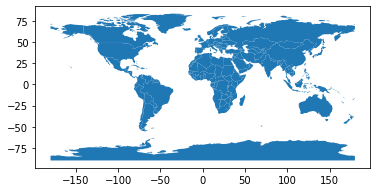

In [75]:
world.plot()

### Mapes de color

Per crear mapes de color, on la tonalitat de cada forma es basa en un valor associat, 
cal utilitzar el mètode `plot()` amb el paràmetre `column`.

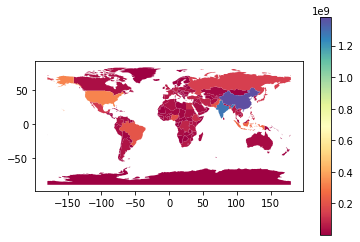

In [76]:
world.plot(column='pop_est', legend=True, cmap='Spectral')

Per afegir la llegenda podem utilitzar el paràmetre `legend=True`.
El paràmetre `cmap` permet escollir un mapa de color.
La llista completa es troba a la pàgina de [matplotlib](https://matplotlib.org/users/colormaps.html).

### Mapes amb capes

Abans de combinar mapes cal assegurar-se que comparteixen el sistema de coordenades.

Per utilitzar un mapa com a base d'una altra capa cal passar-lo a través del paràmetre `ax`.

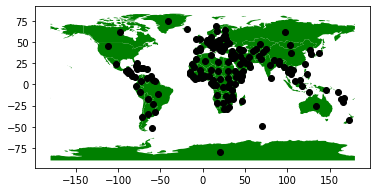

In [77]:
base = world.plot(color='green')
world.centroid.plot(ax=base, color='black')

Una altra possibilitat, més flexible, consisteix a utilitzar els objectes de la llibreria **matplotlib**.

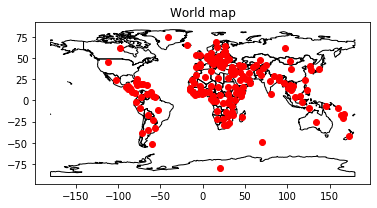

In [78]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

world.plot(ax=ax, color='none', edgecolor='black')
world.centroid.plot(ax=ax, color='red')
ax.set_title("World map")

plt.show()

## Sistemes de referència de coordenades

Els Sistemes de Referència de Coordenades (SRC) indiquen a quina posició de la Terra es troben les formes geomètriques.
Els SRC es referencien utilitzant codis anomenats **proj4 strings**; a més, les projeccions més habituals també poden ser 
referenciades utilitzant els codis EPSG.

Les dades importades d'un fitxer inclouen la informació de la projecció, que podem obtenir amb l'atribut `crs`.
Establir una projecció és necessari quan les dades tenen unes coordenades, però no està referenciada la seva posició a la Terra. Per fer-ho cal indicar un valor a l'atribut `crs`. La funció `to_crs()` permet canviar el sistema de coordenades d'unes dades.

In [81]:
protected_areas.crs

{'init': 'epsg:4326'}

In [82]:
protected_areas = protected_areas.to_crs({'init': 'epsg:3395'})
protected_areas.crs

{'init': 'epsg:3395'}

## Manipulacions geomètriques

GeoPandas permet utilitzar totes les eines per a les manipulacions geomètriques de la llibreria **shapely**.
Aquestes eines s'apliquen a tots els objectes geomètrics de la `GeoSerie` o del `GeoDataFrame`.

**Mètodes constructors**

Generen una `GeoSeries`:

* `buffer()` - Genera un nou polígon amb tots els punts dins d'una determinada distància a l'objecte inicial
* `boundary` - Genera un objecte de dimensió inferior que representa el límit teòric de cada geometria (el contorn)
* `centroid` - Retorna el punt centroide de cada geometria
* `convex_hull` - Genera el polígon convex més petit que conté tots els punts de cada geometria
* `envelope` - Genera el polígon rectangular més petit que conté cada objecte
* `simplify()` - Genera una representació simplificada de cada objecte

Genera una objecte geomètric:

* `unary_union` - Genera una geometria unió de tots els elements de `GeoSeries` 

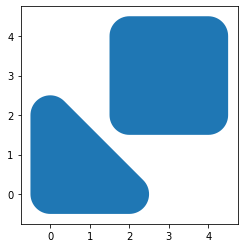

In [88]:
figures.buffer(0.5).plot()

**Transformacions afins**

* `affine_transform()` - transforma les geometries utilitzant una matriu de transformacions
* `rotate()` - rotació de l'objecte el nombre de graus especificat
* `scale()` - modifica l'escala al llarg de qualsevol eix
* `skew()` - deforma les geometries per angles al llarg de les dimensions x i y
* `translate()` - canvia les coordenades

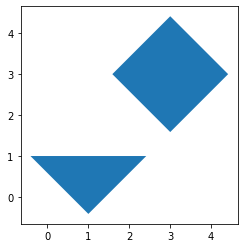

In [89]:
figures.rotate(45).plot()

## Operacions entre conjunts sobreposats

Es tracta de les operacions habituals entre geometries que se sobreposen:

* `intersection` - intersecció, punts en comú
* `union` - unió, tots els punts
* `difference` - diferència, punts d'una geometria no sobreposats a l'altra
* `symetrical difference` - diferència simètrica, punts no sobreposats, inversa de la intersecció

Aquestes operacions s'implementen a través de la funció `overlay()` i el paràmetre `how` i només funcionen sobre objecte `GeoDataFrame`.

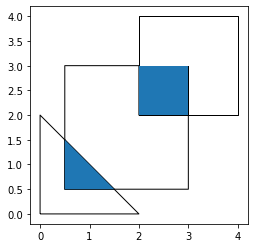

In [91]:
quadrat = gpd.GeoSeries([Polygon([(0.5,0.5), (3,0.5), (3,3), (0.5,3)])])

df1 = gpd.GeoDataFrame({'geometry':figures, 'formes':[1,2]})
df2 = gpd.GeoDataFrame({'geometry':quadrat, 'formes':[1]})

unio = gpd.overlay(df1, df2, how='union')
interseccio = gpd.overlay(df1, df2, how='intersection')

base = unio.plot(color='none', edgecolor='black')
interseccio.plot(ax=base)

## Agregació

Per agregar dades a partir de la informació geomètrica utilitzem la funció `dissolve`.
Aquesta funció realitza tres tasques:

* Uneix totes les geometries en un únic objecte utilitzant el mètode `unary_union`
* Agrega totes les files en un registre utilitzant `groupby.aggregate()`
* Combina els dos resultats en un nou `GeoDataFrame`

El paràmetre `aggfunc` permet especificar la funció d'agregació utilitzada. Els seus valors poden ser: *first, last, min, max, sum, mean* i *median*.

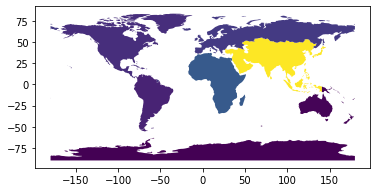

In [73]:
continents = world.dissolve(by='continent', aggfunc='sum')

continents.plot(column='pop_est')

## Combinació de dades

La combinació de diferents estructures de dades pot fer-se de dues maneres:

**Attribute joins**

Les estructures de dades es combinen a partir del valor d'un atribut. Es tracta de l'operació de `join` habitual amb el mètode `merge()` de Pandas. El `GeoDataFrame` ha de situar-se a l'esquerra i el `DataFrame` a la dreta.

**Spatial joins**

Els registres es combinen a partir de les seves relacions a l'espai. S'utilitza el mètode `sjoin()` amb els paràmetres `how` i `op`.

* `op`: intersects, within, contains
* `how`: left, right, inner


## Geocoding

GeoPandas suporta el **geocoding** a través de [GeoPy](https://geopy.readthedocs.io/en/stable/). Aquesta eina permet situar en un mapa adreces, ciutats, països... 

Aquesta funció es troba a `gpd.tools.geocode()` i el paràmetre `provider` permet especificar el servei de geocoding utilitzat.

## Referències

* [geopandas.org](http://geopandas.org/)
* [Documentació oficial](http://geopandas.org/reference.html)
* [shapely](https://shapely.readthedocs.io/en/latest/manual.html)
* [GeoPy](https://geopy.readthedocs.io/en/stable/)